In [1]:
import satelite as st

In [2]:
#platformnameとprocessinglevelは下のやつがデフォルトで入ってるので、わざわざ指定する必要はない
#location,width,height,name,dateが必須の引数
#実行すると、その期間のその場所で一番雲がかかってない画像をダウンロードする。
#そんでダウンロードしたでかい画像から、指定範囲の画像をbandごとにトリミングする
#もうダウンロード済みだったら、ダウンロードはしないけどトリミングで6秒くらい実行時間が必要
#nameは、保存する画像のフォルダと位置情報のpolygonの名前になる。
test = st.EachBandFig(location=[137.0240686,35.1706838],width=0.085,height=0.0678,
                  name="Aichiike",start_date="20190101",end_date="20190128")

この期間の画像の数は12枚です
この期間で1番被覆率が低いのは2019-01-01日


/Users/sakuma/anaconda3/lib/python3.6/site-packages/pyproj/crs/crs.py:55: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/Users/sakuma/anaconda3/lib/python3.6/site-packages/pyproj/crs/crs.py:55: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/Users/sakuma/anaconda3/lib/python3.6/site-packages/pyproj/crs/crs.py:55: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be 

In [3]:
#解像度10mのバンドごとの画像データ
test.r10m

{'02': array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]]], dtype=uint16),
 '03': array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]]], dtype=uint16),
 '04': array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]]], dtype=uint16),
 '08': array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]]], dtype=uint16)}

/Users/sakuma/Desktop/Datascience/satelite.py:286: RuntimeWarning: invalid value encountered in true_divide
  ratio_array = np.where((band1+band2)==0., 0, (band1-band2)/(band1+band2))


写ってる範囲の面積 = 60.8279km2
値が0以上の面積 = 2.0176km2
0以上の割合 = 3.316898988786395%


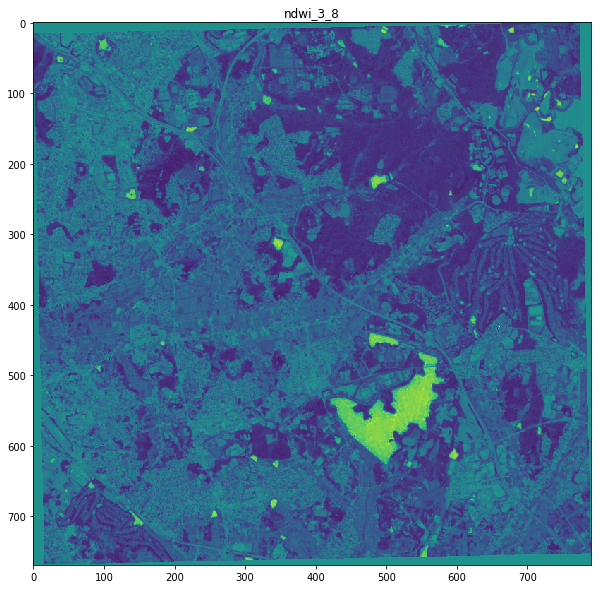

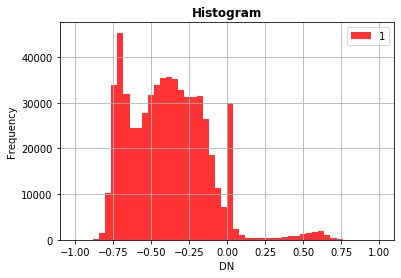

In [4]:
#こんな感じで,trueカラー,falseカラー,swirカラー,agricultureカラー
#ndvi,ndsi,moisture_index,ndwi(band3,8とband4と11)を描画できる。
ndwi = test.ndwi_3_8()

/Users/sakuma/Desktop/Datascience/satelite.py:286: RuntimeWarning: invalid value encountered in true_divide
  ratio_array = np.where((band1+band2)==0., 0, (band1-band2)/(band1+band2))


写ってる範囲の面積 = 60.8279km2
値が0以上の面積 = 2.0175km2
0以上の割合 = 3.316734590541511%


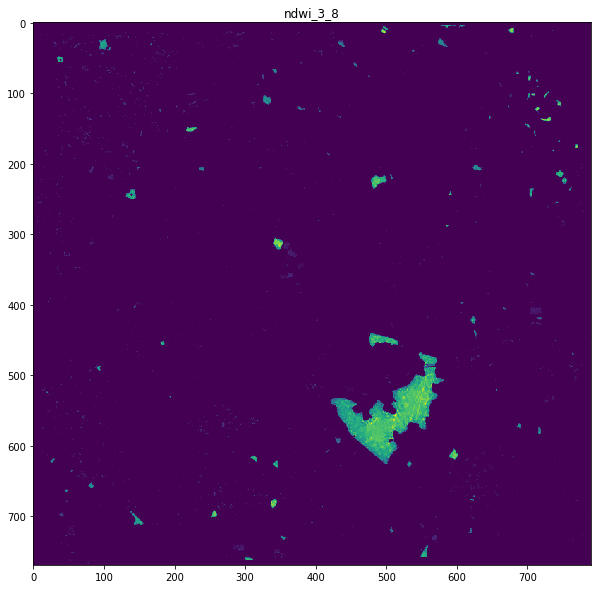

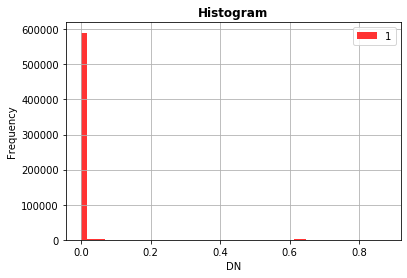

In [6]:
#閾値はthreshで下限と上限を指定
#0を挟むと面積の計算はうまく出来ない。
ndwi = test.ndwi_3_8(thresh=[0,1])

/Users/sakuma/Desktop/Datascience/satelite.py:286: RuntimeWarning: invalid value encountered in true_divide
  ratio_array = np.where((band1+band2)==0., 0, (band1-band2)/(band1+band2))


写ってる範囲の面積 = 60.8279km2
値が0以上の面積 = 17.3988km2
0以上の割合 = 28.603321830936135%


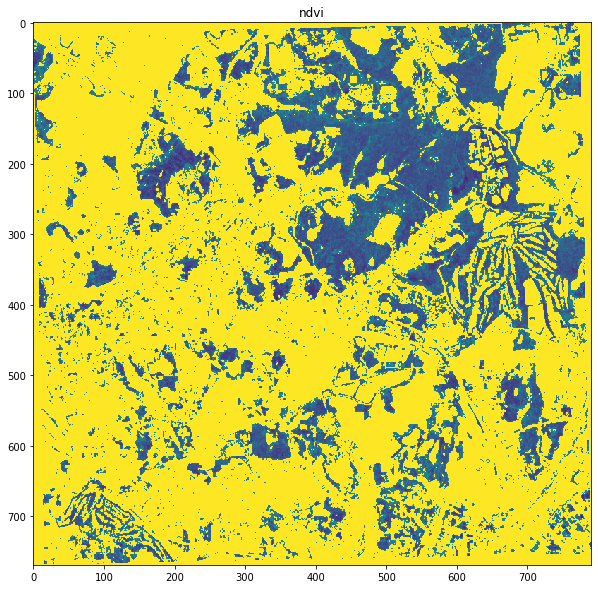

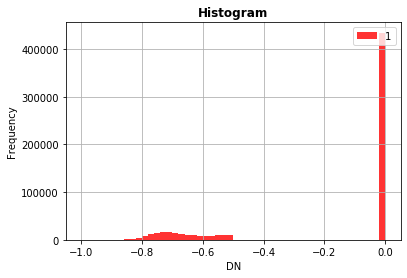

In [7]:
#store=Trueで画像をこの場所の名前のフォルダに保存
#なんだけどうまく保存できてない気がします...
green = test.ndvi(thresh=[-1,-0.5],store=True)

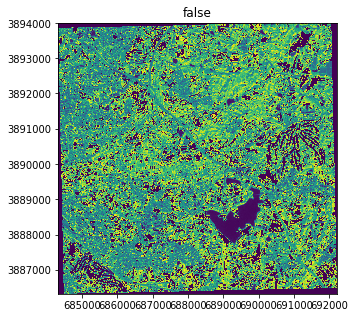

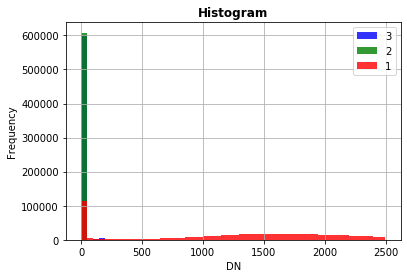

In [8]:
#3band使う系の指標（true,false,swir,agr）は閾値をそれぞれのbandごとに指定
#figsizeも指定できる
#3band系の画像は描画のときに勝手に画像が保存される
fal = test.falsecolor(r_thresh=[0,2500],g_thresh=[0,100],b_thresh=[0,200],figsize=(5,5))

In [12]:
#ダウンロードした衛星画像の中にある座標ならダウンロード無しで表示可能
tiny_test = st.EachBandFig(location=[137.0690686,35.1296838],width=0.017,height=0.019,
                  name="Aichiike",start_date="20190101",end_date="20190128")

この期間の画像の数は6枚です
この期間で1番被覆率が低いのは2019-01-01日


/Users/sakuma/anaconda3/lib/python3.6/site-packages/pyproj/crs/crs.py:55: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/Users/sakuma/anaconda3/lib/python3.6/site-packages/pyproj/crs/crs.py:55: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/Users/sakuma/anaconda3/lib/python3.6/site-packages/pyproj/crs/crs.py:55: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be 

/Users/sakuma/Desktop/Datascience/satelite.py:286: RuntimeWarning: invalid value encountered in true_divide
  ratio_array = np.where((band1+band2)==0., 0, (band1-band2)/(band1+band2))


写ってる範囲の面積 = 3.44km2
値が0以上の面積 = 0.8813km2
0以上の割合 = 25.619186046511626%


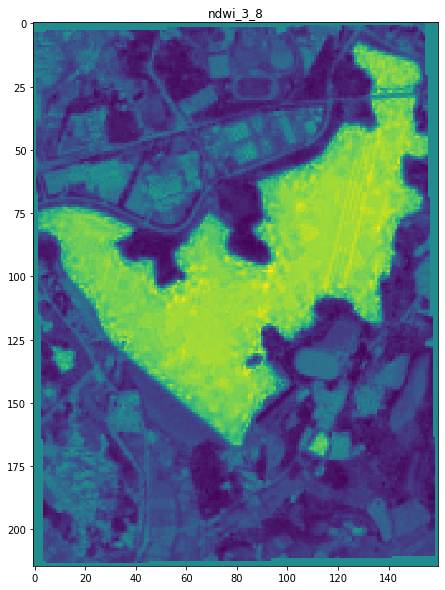

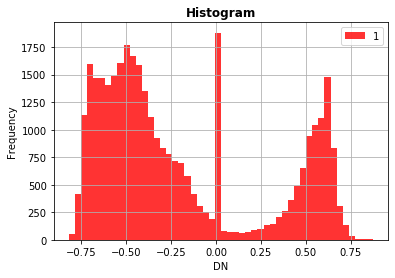

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [13]:
tiny_test.ndwi_3_8()
#返り値は下の通り、2次元のnumpy array

In [14]:
#mapアトリビュートで指定位置をmap表示できる
tiny_test.map